In [15]:
import requests
from bs4 import BeautifulSoup
myBaseUrl = "https://www.amazon.com/Bionix-Health-Safestraw-Drinking-Liquids/product-reviews/B00L3D2MZ4/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber="
# for different product change this base url, should end with page number = 
start_urls = []
for i in range(1, 5): # for different product change second number in range to number of review pages + 1
    start_urls.append(myBaseUrl + str(i))

HEADERS = {
    'authority': 'www.amazon.com',
'method' : 'POST',
'path' : '/gp/redirection/singapore.html',
'scheme' : 'https',
'accept':'*/*',
'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36'
    
}
response = []
for i in start_urls:
    response.append(requests.get(i,headers=HEADERS))
print(response)

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


In [16]:
#collects soup data
soups = []
for i in response:
    soups.append(BeautifulSoup(i.content))
    
#collects and cleans review data
reviews = []
for soup in soups:
    review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
    for i in review:
        reviews.append(i.text)
strippedreviews = []
for review in reviews:
    strippedreviews.append(review.strip())

In [21]:
#collects and cleans title data 
titles = []
for soup in soups:
    title = soup.findAll("a",{'class':"a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold"})
    for i in title:
        titles.append(i.text)
strippedtitles = []
for title in titles:
    strippedtitles.append(title.strip())


In [18]:
finalstars = []
for soup in soups:
    star = soup.findAll(attrs = {'data-hook':"review-star-rating"})
    for i in star: 
        finalstars.append(i.text)

In [19]:
#creates a csv file with title and review data 
import pandas as pd    

df = pd.DataFrame(strippedtitles, columns=["title"])   
df.to_csv('soupbionixthin.csv', index=False)  #change name of csv file as needed 
read = pd.read_csv("soupbionixthin.csv")
read["review"] = strippedreviews
read.to_csv("soupbionixthin.csv", index=False)
read["star"] = finalstars
read.to_csv("soupbionixthin.csv", index=False)
df = pd.read_csv("soupbionixthin.csv")

In [22]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,Mostly retired rehab nurse here.,It's a good tool for someone cognitively intac...,4.0 out of 5 stars,0.174395,0.521177
1,Frustration for memory patients discourages th...,Recommended by Speech therapist:The package ca...,2.0 out of 5 stars,0.337500,0.565152
2,Doesn’t do the job as expected,This device was recommended by a speech therap...,1.0 out of 5 stars,0.250000,0.750000
3,Bellow expectations,is difficult to be the first negative reviewer...,1.0 out of 5 stars,0.101515,0.474852
4,Excellent product,Item worked beyond expectations. My aunt can n...,5.0 out of 5 stars,0.175238,0.286667
5,Great product but prepare for learning curve,This is a great product when used correctly an...,5.0 out of 5 stars,0.240816,0.431293
6,Doesn't work,Did not work the way I was expecting. Tried it...,1.0 out of 5 stars,-0.147222,0.558333
7,Works ok,Works ok most of the time if you don’t over po...,5.0 out of 5 stars,0.500000,0.500000
8,Didn't Work,This doesn't work! It still allows too much wa...,1.0 out of 5 stars,0.200000,0.200000
9,Helps with swallowing,This accessory to the straw helps with drinkin...,5.0 out of 5 stars,-0.062500,0.687500


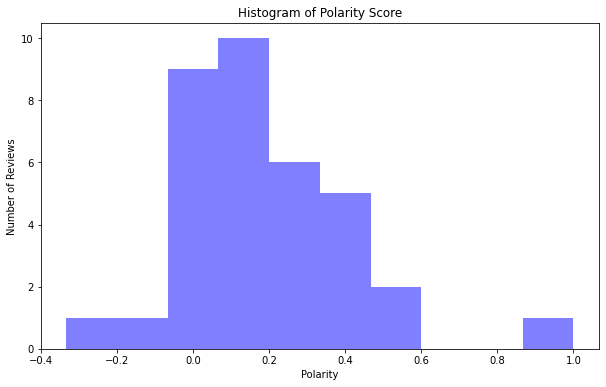

In [24]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [25]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.1857613979163925
Median of Polarity:  0.17367724867724868


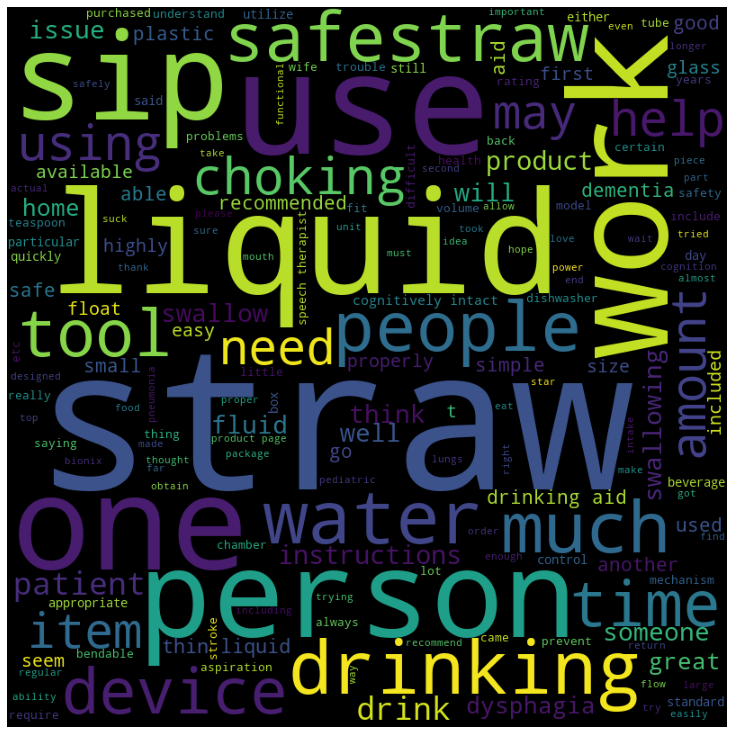

In [26]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

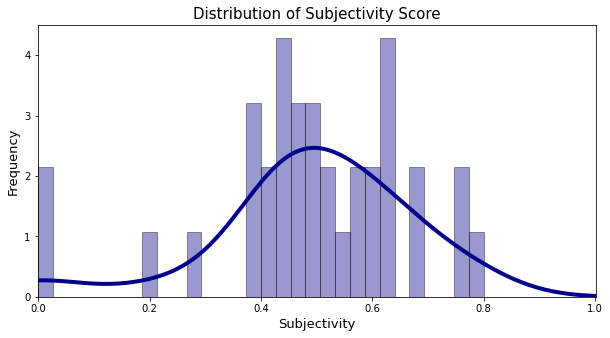

In [27]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)